# Ejercicio 3: Generación, Análisis y Filtrado de Señales

En este ejercicio se trabajará con la generación de señales, análisis en el dominio del tiempo y frecuencia, y filtrado digital.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import butter, filtfilt

## 1. Crear señal con dos senos y término constante

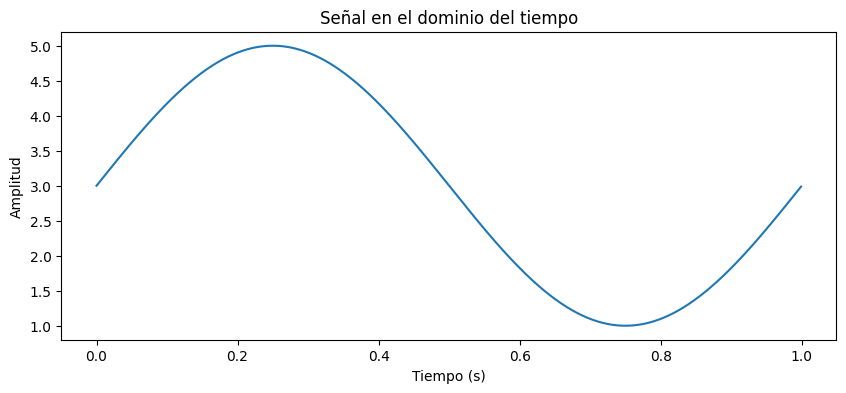

In [9]:
#Señal 1
fs = 1000  # Frecuencia de muestreo (Hz)
t = np.arange(0, 1, 1/fs)
sine1 = 2 * np.sin(2 * np.pi * 1 * t)
trend = 3 * np.ones_like(t)
signal = sine1 + trend

plt.figure(figsize=(10,4))
plt.plot(t, signal)
plt.title('Señal en el dominio del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

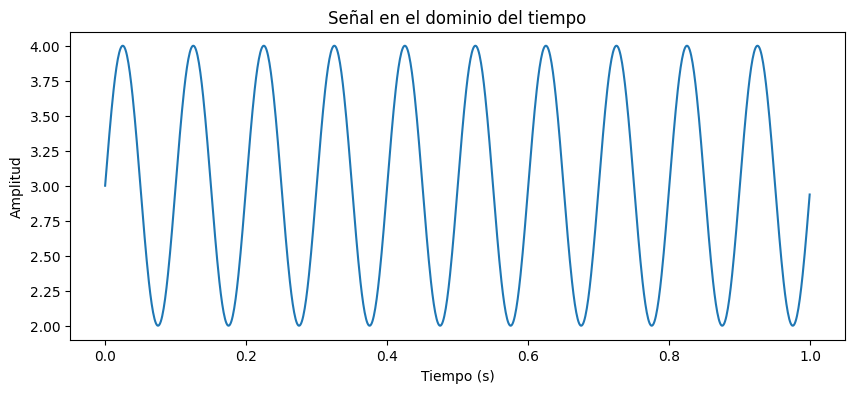

In [10]:
fs = 1000  # Frecuencia de muestreo (Hz)
t = np.arange(0, 1, 1/fs)
sine2 = 1 * np.sin(2 * np.pi * 10 * t)
trend = 3 * np.ones_like(t)
signal = sine2 + trend

plt.figure(figsize=(10,4))
plt.plot(t, signal)
plt.title('Señal en el dominio del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

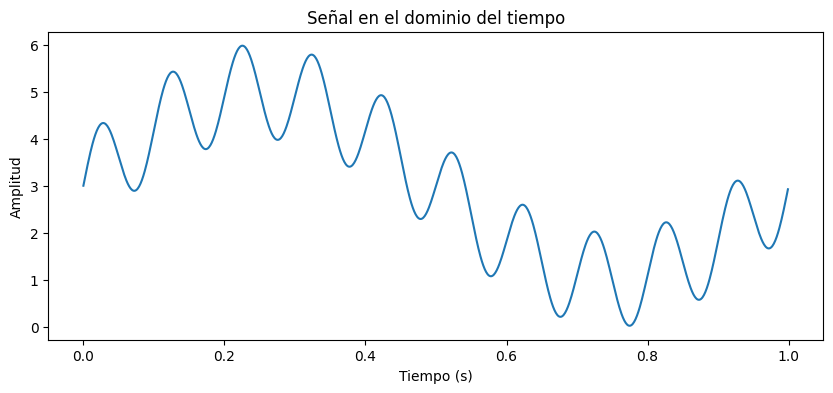

In [2]:
fs = 1000  # Frecuencia de muestreo (Hz)
t = np.arange(0, 1, 1/fs)
sine1 = 2 * np.sin(2 * np.pi * 1 * t)
sine2 = 1 * np.sin(2 * np.pi * 10 * t)
trend = 3 * np.ones_like(t)
signal = sine1 + sine2 + trend

plt.figure(figsize=(10,4))
plt.plot(t, signal)
plt.title('Señal en el dominio del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

## 2. Dominio de frecuencia de la señal (FFT)

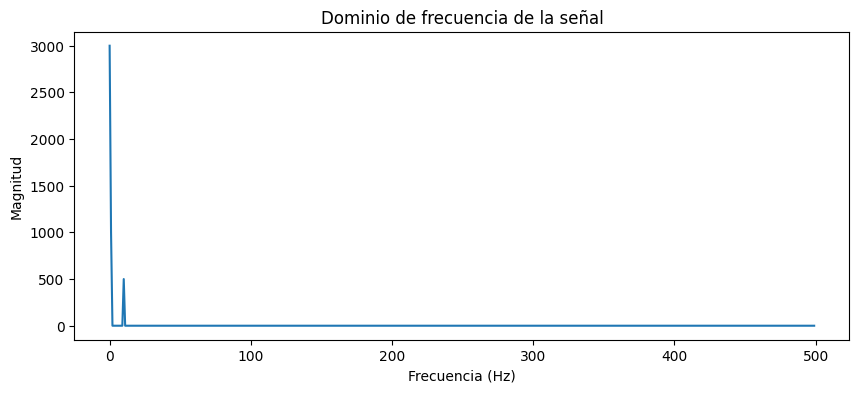

In [3]:
# Calcular la cantidad de muestras de la señal
N = len(signal)

# Aplicar la Transformada Rápida de Fourier (FFT) para obtener las componentes de frecuencia
yf = fft(signal)
# Calcular los valores de frecuencia correspondientes a cada componente FFT
xf = fftfreq(N, 1/fs)

# Graficar el espectro de magnitud (solo la mitad positiva, ya que la señal es real)
plt.figure(figsize=(10,4))
plt.plot(xf[:N//2], np.abs(yf[:N//2]))
plt.title('Dominio de frecuencia de la señal')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.show()
# La gráfica muestra las frecuencias presentes en la señal: picos en 1 Hz y 10 Hz, y un componente en 0 Hz (término constante).

## 3. Generar ruido gaussiano y analizar

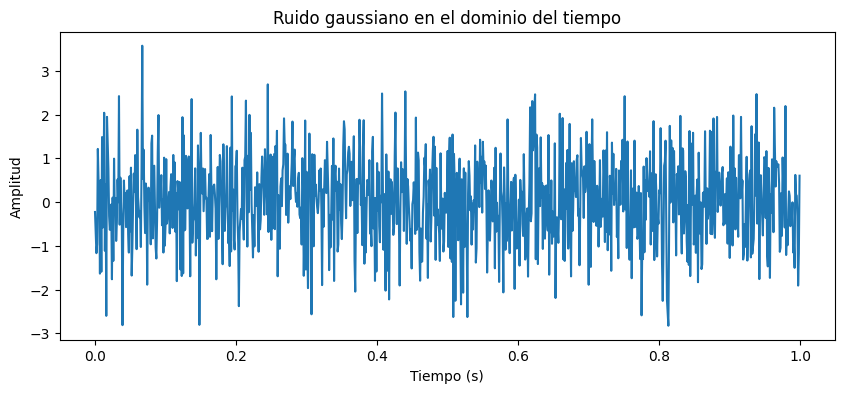

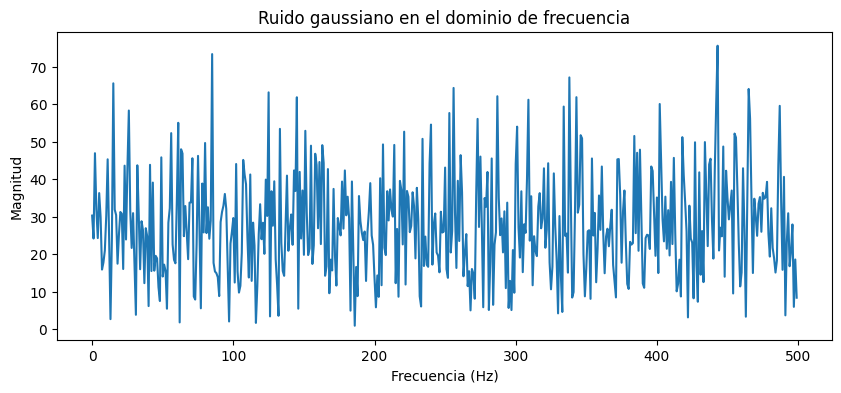

In [4]:
noise = np.random.normal(0, 1, N)
plt.figure(figsize=(10,4))
plt.plot(t, noise)
plt.title('Ruido gaussiano en el dominio del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

yf_noise = fft(noise)
plt.figure(figsize=(10,4))
plt.plot(xf[:N//2], np.abs(yf_noise[:N//2]))
plt.title('Ruido gaussiano en el dominio de frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.show()

## 4. Sumar señales con diferentes amplitudes

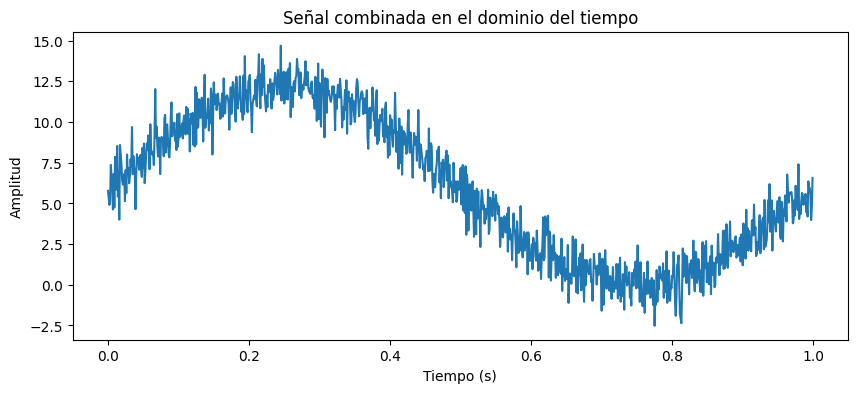

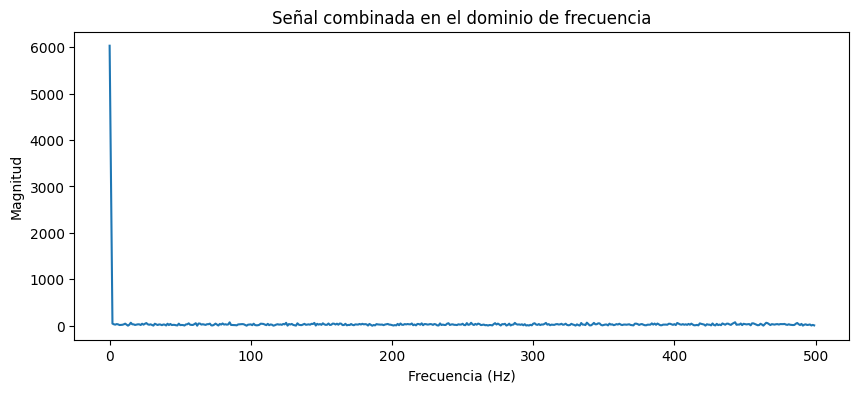

In [5]:
combined = 3*sine1 + 2*trend + 1*noise
plt.figure(figsize=(10,4))
plt.plot(t, combined)
plt.title('Señal combinada en el dominio del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

yf_combined = fft(combined)
plt.figure(figsize=(10,4))
plt.plot(xf[:N//2], np.abs(yf_combined[:N//2]))
plt.title('Señal combinada en el dominio de frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.show()

## 5. Filtrado: modificar alpha, div_factor, orden y frecuencia de corte

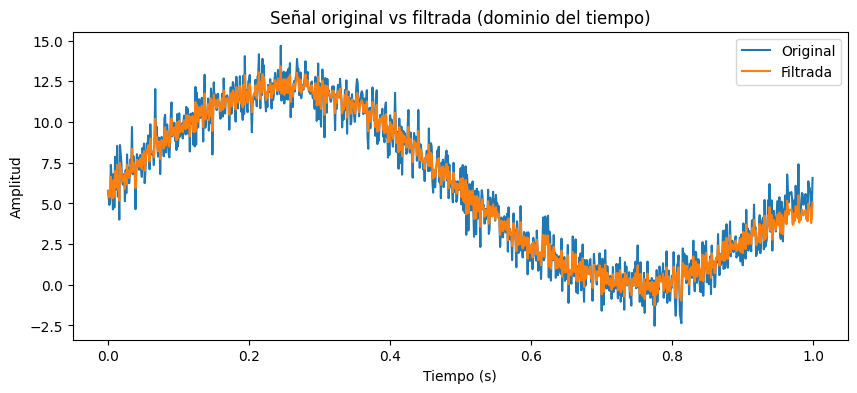

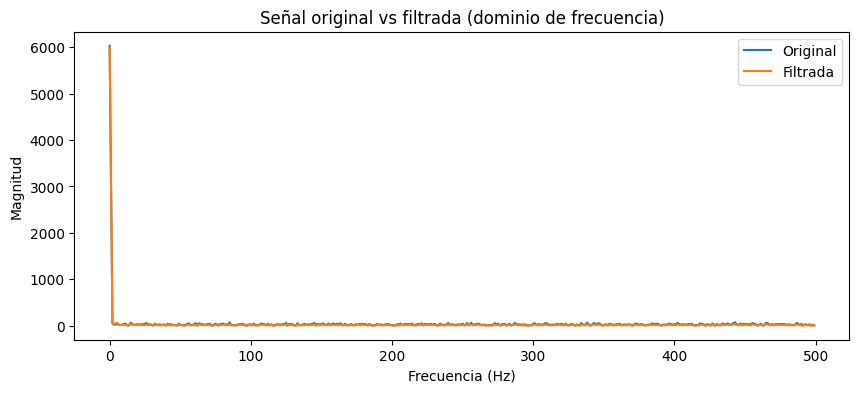

In [6]:
# Parámetros del filtro
order = 4  # Orden del filtro: determina la pendiente del filtro, mayor orden = mayor atenuación fuera de la banda.
cutoff = 5  # Frecuencia de corte (Hz): frecuencia máxima que pasa el filtro, frecuencias mayores se atenúan.
alpha = 0.5  # Factor de suavizado: controla cuánto se mezcla la señal filtrada con la original (0=solo original, 1=solo filtrada).
div_factor = 1.0  # Factor divisor para la frecuencia de corte: permite ajustar la frecuencia de corte de forma flexible.

 # Filtro Butterworth
b, a = butter(order, (cutoff/div_factor)/(fs/2), btype='low')
filtered = filtfilt(b, a, combined) * alpha + combined * (1-alpha)

plt.figure(figsize=(10,4))
plt.plot(t, combined, label='Original')
plt.plot(t, filtered, label='Filtrada')
plt.title('Señal original vs filtrada (dominio del tiempo)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

yf_filtered = fft(filtered)
plt.figure(figsize=(10,4))
plt.plot(xf[:N//2], np.abs(yf_combined[:N//2]), label='Original')
plt.plot(xf[:N//2], np.abs(yf_filtered[:N//2]), label='Filtrada')
plt.title('Señal original vs filtrada (dominio de frecuencia)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.legend()
plt.show()

## 6. Experimenta cambiando los parámetros

Modifica los valores de `alpha`, `div_factor`, `order` y `cutoff` en la celda anterior para observar cómo afectan el filtrado de la señal.

## Análisis de frecuencia de un archivo de audio MP3

A continuación se muestra cómo cargar un archivo MP3, extraer la señal de audio y analizar su contenido en frecuencia usando FFT.

In [7]:
!pip install librosa

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 12.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 23.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ------- -------------------------------- 6.8/38.1 MB 34.9 MB/s eta 0:00:01
   --------------- ------------------------ 14.9/38.1 MB 37.5 MB/s eta 0:00:01
   ---------------------- ----------------- 21.5/38.1 MB 34.9 MB/s eta 0:00:01
   ------------------------------ --------- 29.4/38.1 MB 35.8 MB/s eta 0:00:01
   ---------------------------------------  38.0/38.1 MB 36.6 MB/s eta 0:00:01
   ---------------------------------------- 38.1/38.1 MB 32.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


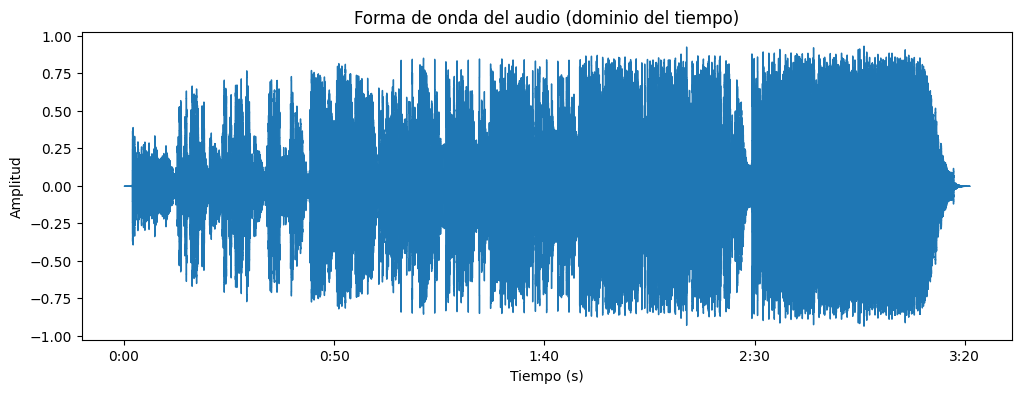

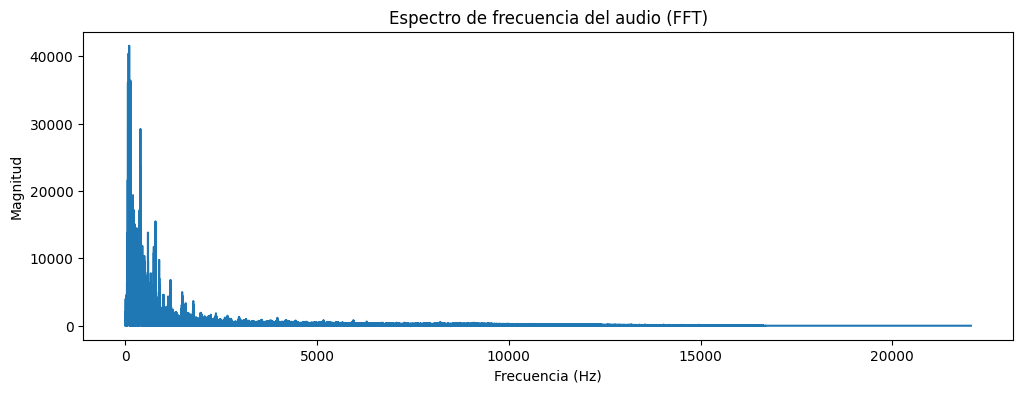

In [8]:
# Instala librosa si no lo tienes: pip install librosa
import librosa
import librosa.display

# Cargar archivo MP3 (cambia 'archivo.mp3' por el nombre de tu archivo)
audio_path = 'Andrés Cepeda - Desesperado (Official Video).mp3'
y, sr = librosa.load(audio_path, sr=None)  # y: señal, sr: frecuencia de muestreo

# Mostrar la forma de onda (dominio del tiempo)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Forma de onda del audio (dominio del tiempo)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

# Análisis de frecuencia con FFT
N = len(y)
yf = fft(y)
xf = fftfreq(N, 1/sr)

plt.figure(figsize=(12, 4))
plt.plot(xf[:N//2], np.abs(yf[:N//2]))
plt.title('Espectro de frecuencia del audio (FFT)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.show()
# Puedes identificar las frecuencias dominantes del audio, como notas musicales, voces o instrumentos.